In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

import mlrose

import numpy as np
import pandas as pd

from scipy.io import arff
import matplotlib.pyplot as plt
#FROM PROJECT 1 DATA PREP
# training_score = 'training score'
# cross_validation_score = 'cross validation score'
# y_label = 'fl score'

# np.random.seed(3141531) 
# tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
# pd.set_option('display.max_columns', None)


# file = "income_data_final.csv"
# df = pd.read_csv(file)
# df = df.sample(frac=1).reset_index(drop=True)

# #df = pd.DataFrame(data[0])
# features = ['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

# x_features = df[features]

# onehotencoder = OneHotEncoder(categorical_features = [1,3,4,5,6,7,8,9])
# x_features = onehotencoder.fit_transform(x_features).toarray()
# y_predict = df.y_predict

# #######################################################################
# ### NN FOR PROJECT 2
# #######################################################################




# #.1024
# #x_g,x_hypertune, y_g, y_hypertune  = train_test_split(x_features, y_predict, test_size=0.1024, random_state=143)
# x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=143)

# ##spliting training set into a smaller set
# x_g,x_hypertune, y_g, y_hypertune = train_test_split(x_train, y_train, test_size=0.2, random_state=122)


# train_sizes_lc = [300, 6000, 12000, 16000, 20000, 24000]


/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# is wine data set better?
#loading wine data ..
file = "wine.arff"
data = arff.loadarff(file)
df = pd.DataFrame(data[0])

features = ['fixed_acidity',  'pH', 'residual_sugar', 'volatile_acidity',  
'citric_acid',  'chlorides', 'free_sulfur_dioxide',  
'total_sulfur_dioxide',  'density',  'sulphates', 'alcohol']

##remove pH, residual_sugar

x_features = df[features]
y_predict = df.quality

x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=1)
#x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train, y_train, test_size=0.2, random_state=12)



train_sizes_lc = [30, 100, 250, 400, 600, 894]
train_sizes3 = [30, 120, 250, 400, 600, 894]

print(y_train)

126     0.0
810     0.0
635     0.0
598     1.0
880     0.0
       ... 
715     1.0
905     0.0
1096    1.0
235     1.0
1061    1.0
Name: quality, Length: 1119, dtype: float64


In [3]:
def plot_lc(title, train_sizes, train_scores, validation_scores):
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)


    plt.style.use('seaborn')
    plt.plot(train_sizes_lc, train_scores_mean, label = "training_score")
    plt.plot(train_sizes_lc, validation_scores_mean, label = "cross_validation_score")
    plt.ylabel("f1 score", fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.0,1.0)
    
    return plt

def plot_vc(title, train_scores, validation_scores, plot_range):
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)

    plt.style.use('seaborn')
    plt.plot(plot_range, train_scores_mean, label = "training_score")
    plt.plot(plot_range, validation_scores_mean, label = "cross_validation_score")
    plt.ylabel("f1 score", fontsize = 14)
    plt.xlabel('max_iter', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.0,1.0)
    
    return plt

def plot_single(title, train_scores, plot_range):
    train_scores_mean = train_scores.mean(axis = 1)

    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)

    plt.style.use('seaborn')
    plt.plot(plot_range, train_scores_mean, label = "training_score")
    plt.plot(plot_range, validation_scores_mean, label = "cross_validation_score")
    plt.ylabel("f1 score", fontsize = 14)
    plt.xlabel('max_iter', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.0,1.0)
    
    return plt

In [69]:
# RANDOM HILL CLIMB

##LR .0001
nn_model1_rhc = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = .1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, restarts=5)

#nn_model1_rhc.fit(x_train, y_train)
train_sizes_rhc, train_scores_rhc, validation_scores_rhc = learning_curve(
estimator = nn_model1_rhc,
X = x_train,
y = y_train, train_sizes = train_sizes_lc, cv = 5,
scoring = 'f1',
n_jobs=5)
    

Training scores:

 [[0.         0.69565217 0.66666667 0.54545455 0.69565217]
 [0.52892562 0.7654321  0.61290323 0.7518797  0.63076923]
 [0.60899654 0.54347826 0.64646465 0.65671642 0.70466321]
 [0.69546436 0.69979296 0.69918699 0.5720339  0.52466368]
 [0.70358306 0.71520343 0.         0.56913183 0.64748201]
 [0.56730769 0.07751938 0.48917749 0.42465753 0.69776119]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.         0.70144928 0.76491228 0.57241379 0.70348837]
 [0.50533808 0.69970845 0.54826255 0.6490566  0.6031746 ]
 [0.66666667 0.53497942 0.7238806  0.61728395 0.70348837]
 [0.72156863 0.61710037 0.70144928 0.53731343 0.52964427]
 [0.69411765 0.70144928 0.         0.5787234  0.66409266]
 [0.60663507 0.12121212 0.48760331 0.44343891 0.72      ]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

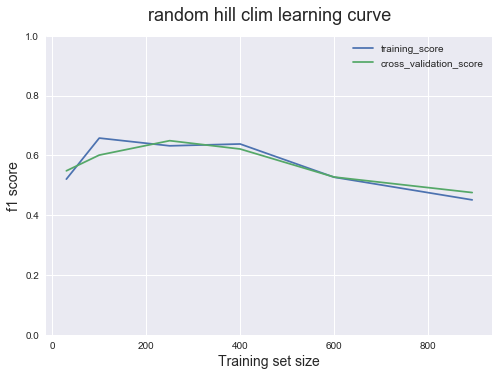

In [70]:
plot_lc("random hill clim learning curve", train_sizes_rhc, train_scores_rhc, validation_scores_rhc)

In [ ]:
###LOOKING AT MAX_ITER
#### NN Hyperparam 1 ######
max_iter_rhc = []
for n in range(1, 10):
    max_iter_rhc.append(n*1000)

nn_model1_rhc = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = .1, \
                                 early_stopping = False, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, restarts=3)

train_scores_rhc, validation_scores_rhc = validation_curve(
estimator = nn_model1_rhc,
param_name = "max_iter",
param_range = max_iter_rhc,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1',
n_jobs=5)


In [ ]:
plot_vc("random hill climb - Max Iter / Epochs", train_scores_rhc, validation_scores_rhc, max_iter_rhc)

In [80]:
####TRAIN NN FOR RANDOM HILL CLIMB
nn_model1_rhc = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = .1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, restarts=3)

nn_model1_rhc.fit(x_train, y_train)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True, hidden_nodes=[9, 8],
              is_classifier=True, learning_rate=0.1, max_iters=5000,
              mutation_prob=0.1, pop_size=200, restarts=3,
              schedule=<mlrose.decay.GeomDecay object at 0x125508690>)

In [81]:
#RANDOM HILL CLIMB RESULTS
y_pred_train = nn_model1_rhc.predict(x_train)
train_res = metrics.classification_report(y_train, y_pred_train, output_dict = True)
print({"TRAIN": train_res})
print("\n")
# Predict labels for test set and assess accuracy
y_pred_test = nn_model1_rhc.predict(x_test)

test_res = metrics.classification_report(y_test, y_pred_test, output_dict = True)
print({"TEST": test_res})

print("LOSS FUNCTION")
print(nn_model1_rhc.loss)

{'TRAIN': {'0.0': {'precision': 0.6841085271317829, 'recall': 0.6867704280155642, 'f1-score': 0.6854368932038835, 'support': 514}, '1.0': {'precision': 0.7330016583747927, 'recall': 0.7305785123966942, 'f1-score': 0.7317880794701985, 'support': 605}, 'accuracy': 0.710455764075067, 'macro avg': {'precision': 0.7085550927532878, 'recall': 0.7086744702061292, 'f1-score': 0.708612486337041, 'support': 1119}, 'weighted avg': {'precision': 0.7105431512622753, 'recall': 0.710455764075067, 'f1-score': 0.710497186046708, 'support': 1119}}}


{'TEST': {'0.0': {'precision': 0.6651982378854625, 'recall': 0.6565217391304348, 'f1-score': 0.660831509846827, 'support': 230}, '1.0': {'precision': 0.6877470355731226, 'recall': 0.696, 'f1-score': 0.6918489065606361, 'support': 250}, 'accuracy': 0.6770833333333334, 'macro avg': {'precision': 0.6764726367292926, 'recall': 0.6762608695652174, 'f1-score': 0.6763402082037315, 'support': 480}, 'weighted avg': {'precision': 0.6769424033477854, 'recall': 0.67708

In [30]:
#### SIMULATED ANEALING

nn_model1_sa = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'simulated_annealing', max_iters = 15000, \
                                 bias = True, is_classifier = True, learning_rate = .01, \
                                 early_stopping = False, clip_max = 5, max_attempts = 10, \
                                 random_state = 33)

#nn_model1_rhc.fit(x_train, y_train)
train_sizes_sa, train_scores_sa, validation_scores_sa = learning_curve(
estimator = nn_model1_sa,
X = x_train,
y = y_train, train_sizes = train_sizes_lc, cv = 5,
scoring = 'f1',

n_jobs=5)

Training scores:

 [[0.81081081 0.83333333 0.8125     0.76470588 0.58064516]
 [0.71428571 0.83916084 0.82517483 0.78873239 0.78832117]
 [0.63043478 0.48730964 0.69257951 0.72118959 0.72852234]
 [0.40506329 0.77822581 0.71206226 0.67611336 0.68514851]
 [0.68326418 0.72156863 0.73640167 0.7436919  0.72432432]
 [0.71428571 0.69957983 0.67504836 0.6802444  0.73302326]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.609375   0.53846154 0.63529412 0.54752852 0.4940239 ]
 [0.63878327 0.69565217 0.75618375 0.73754153 0.72542373]
 [0.61135371 0.42622951 0.73170732 0.73092369 0.74418605]
 [0.36170213 0.66176471 0.76223776 0.62686567 0.71378092]
 [0.69372694 0.66896552 0.7816092  0.68794326 0.69964664]
 [0.71272727 0.62040816 0.72868217 0.61788618 0.71532847]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

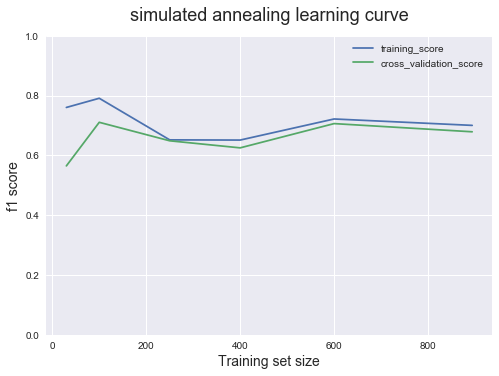

In [31]:
plot_lc("simulated annealing learning curve", train_sizes_sa, train_scores_sa, validation_scores_sa)

In [12]:
###LOOKING AT MAX_ITER
#### SA NN Hyperparam 1 ######

max_iter_sa = []
for n in range(1, 10):
    max_iter_sa.append(n*1000)

nn_model1_sa = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'simulated_annealing', max_iters = 15000, \
                                 bias = True, is_classifier = True, learning_rate = .01, \
                                 early_stopping = False, clip_max = 5, max_attempts = 10, \
                                 random_state = 33)

train_scores_sa, validation_scores_sa = validation_curve(
estimator = nn_model1_sa,
param_name = "max_iter",
param_range = max_iter_sa,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1',
n_jobs=5)


Training scores:

 [[0.07909605 0.69489051 0.51940299 0.         0.03976143]
 [0.69572954 0.24759285 0.50644783 0.         0.69208211]
 [0.70195794 0.20334262 0.         0.70195794 0.70144928]
 [0.         0.65842349 0.         0.70195794 0.70144928]
 [0.69174312 0.46259843 0.         0.         0.70144928]
 [0.61815209 0.70195794 0.7031364  0.38244514 0.70144928]
 [0.         0.         0.70972532 0.39653036 0.66111574]
 [0.         0.70195794 0.         0.6732373  0.        ]
 [0.70195794 0.         0.70195794 0.         0.25666667]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.11940299 0.69767442 0.48627451 0.         0.03174603]
 [0.72542373 0.31182796 0.54807692 0.         0.69208211]
 [0.70144928 0.26815642 0.         0.70144928 0.70348837]
 [0.         0.66666667 0.         0.70144928 0.70348837]
 [0.70072993 0.51181102 0.         0.01639344 0.70348837]
 [0.62783172 0.70144928 0.69767442 0.30188679 0.70348837]
 [0.         0.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

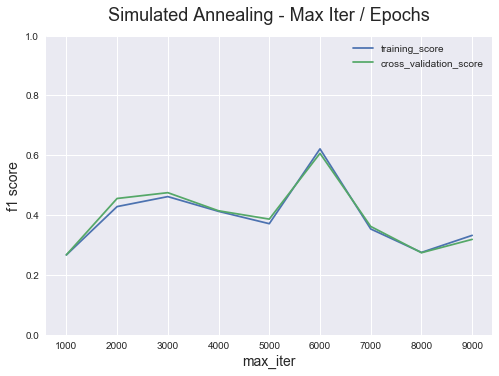

In [13]:
plot_vc("Simulated Annealing - Max Iter / Epochs", train_scores_sa, validation_scores_sa, max_iter_sa)

In [67]:
####TRAIN NN FOR SIM ANAL
nn_model1_sa = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'simulated_annealing', max_iters = 15000, \
                                 bias = True, is_classifier = True, learning_rate = .01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 500, \
                                 random_state = 33)

nn_model1_sa.fit(x_train, y_train)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True, hidden_nodes=[9, 8],
              is_classifier=True, learning_rate=0.01, max_iters=15000,
              mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x125508690>)

In [68]:
# Predict labels for train set and assess accuracy
y_pred_train = nn_model1_sa.predict(x_train)
train_res = metrics.classification_report(y_train, y_pred_train, output_dict = True)
print({"TRAIN": train_res})
print("\n")
# Predict labels for test set and assess accuracy
y_pred_test = nn_model1_sa.predict(x_test)

test_res = metrics.classification_report(y_test, y_pred_test, output_dict = True)
print({"TEST": test_res})

print("LOSS FUNCTION")
print(nn_model1_sa.loss)

{'TRAIN': {'0.0': {'precision': 0.30434782608695654, 'recall': 0.013618677042801557, 'f1-score': 0.0260707635009311, 'support': 514}, '1.0': {'precision': 0.5374087591240876, 'recall': 0.9735537190082645, 'f1-score': 0.6925338036449148, 'support': 605}, 'accuracy': 0.5326184092940125, 'macro avg': {'precision': 0.42087829260552206, 'recall': 0.493586198025533, 'f1-score': 0.35930228357292293, 'support': 1119}, 'weighted avg': {'precision': 0.43035485422588793, 'recall': 0.5326184092940125, 'f1-score': 0.38640154034374624, 'support': 1119}}}


{'TEST': {'0.0': {'precision': 0.3333333333333333, 'recall': 0.013043478260869565, 'f1-score': 0.02510460251046025, 'support': 230}, '1.0': {'precision': 0.5180467091295117, 'recall': 0.976, 'f1-score': 0.6768377253814147, 'support': 250}, 'accuracy': 0.5145833333333333, 'macro avg': {'precision': 0.4256900212314225, 'recall': 0.4945217391304348, 'f1-score': 0.35097116394593747, 'support': 480}, 'weighted avg': {'precision': 0.42953821656050956, '

In [29]:
#### GEN ALG START


nn_model1_ga = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'genetic_alg', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = .5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, pop_size=500)

#nn_model1_rhc.fit(x_train, y_train)
train_sizes_ga, train_scores_ga, validation_scores_ga = learning_curve(
estimator = nn_model1_ga,
X = x_train,
y = y_train, train_sizes = train_sizes_lc, cv = 5,
scoring = 'f1',
n_jobs=5)

KeyboardInterrupt: 

In [ ]:
plot_lc("genetic algorithm learning curve", train_sizes_ga, train_scores_ga, validation_scores_ga)

In [ ]:
###LOOKING AT MAX_ITER
#### SA NN Hyperparam 1 ######

max_iter_ga = []
for n in range(1, 10):
    max_iter_ga.append(n*5000)

nn_model1_ga = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'genetic_alg', max_iters = 50000, \
                                 bias = True, is_classifier = True, learning_rate = .5, \
                                 early_stopping = False, clip_max = 5, max_attempts = 10, \
                                 random_state = 33, pop_size=500)

train_scores_ga, validation_scores_ga = validation_curve(
estimator = nn_model1_ga,
param_name = "max_iter",
param_range = max_iter_ga,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1',
n_jobs=5)


In [ ]:
plot_vc("Genetic Algorithm - Max Iter", train_scores_ga, validation_scores_ga, max_iter_ga)

In [28]:
####TRAIN NN FOR GA
nn_model1_ga = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'genetic_alg', max_iters = 100, \
                                 bias = True, is_classifier = True, learning_rate = .5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10, \
                                 random_state = 33)

nn_model1_ga.fit(x_train, y_train)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True, hidden_nodes=[9, 8],
              is_classifier=True, learning_rate=0.1, max_iters=100,
              mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x125508690>)

In [26]:
## GA FINAL
# Predict labels for train set and assess accuracy
y_pred_train = nn_model1_ga.predict(x_train)
train_res = metrics.classification_report(y_train, y_pred_train, output_dict = True)
print({"TRAIN": train_res})
print("\n")
# Predict labels for test set and assess accuracy
y_pred_test = nn_model1_ga.predict(x_test)

test_res = metrics.classification_report(y_test, y_pred_test, output_dict = True)
print({"TEST": test_res})

print("LOSS FUNCTION")
print(nn_model1_ga.fitted_weights)


{'TRAIN': {'0.0': {'precision': 0.4592391304347826, 'recall': 0.9863813229571985, 'f1-score': 0.626699629171817, 'support': 514}, '1.0': {'precision': 0.5333333333333333, 'recall': 0.013223140495867768, 'f1-score': 0.025806451612903222, 'support': 605}, 'accuracy': 0.46023235031277926, 'macro avg': {'precision': 0.49628623188405796, 'recall': 0.49980223172653315, 'f1-score': 0.3262530403923601, 'support': 1119}, 'weighted avg': {'precision': 0.49929899884731455, 'recall': 0.46023235031277926, 'f1-score': 0.3018199397856304, 'support': 1119}}}


{'TEST': {'0.0': {'precision': 0.4780793319415449, 'recall': 0.9956521739130435, 'f1-score': 0.6459802538787024, 'support': 230}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250}, 'accuracy': 0.47708333333333336, 'macro avg': {'precision': 0.23903966597077245, 'recall': 0.49782608695652175, 'f1-score': 0.3229901269393512, 'support': 480}, 'weighted avg': {'precision': 0.22907967988865693, 'recall': 0.47708333333333336, '

In [ ]:
####TEST
iter_nn_ga = []
for n in range(100,200):
    nn_model1_ga = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = n, \
                                 bias = True, is_classifier = True, learning_rate = .01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10, \
                                 random_state = 1, pop_size=500)
    nn_model1_ga.fit(x_train, y_train)
    y_pred_train = nn_model1_ga.predict(x_train)
    train_res = metrics.classification_report(y_train, y_pred_train, output_dict = True)
    iter_nn_ga.append(train_res["weighted avg"]["f1-score"])


    